# Project : no show appointments

# introduction 

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. we will try to  clean the data and then try figure out why the people don't show up on time 

          

# Questions?

    1- Does the gender affect who show up more at the appointment ?
    2- Does the neighborhood affect who will show up more?
    3- Does people age affect who will gonna show up in the appointment?
    4- Does the medical history or the type of the disease affect who will show up most?
    5- Does sending sms or the time between the appointment and when it has been scheduled affect who will show up the most ?

In [1]:
#importing the library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the data files 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- After investigating the data i found 1 outlier which is 1 person his age is (-1) which is impossible so the next step is to remove the outlier 

In [6]:
df=df[df['Age'] != -1 ]

- After removing the outlier i have to make sure that the data have no null values and have no duplicate data

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()

0

- after making sure that the data have no null value or duplicate data i will change the datatype of Appointment Date and Scheduled Day from object type to datetime

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

- The Appointment ID and the Patient Id columns will not give us any good information about the data and if the patient show up or not so i will gonna drop those columns

In [11]:
df.drop('PatientId',axis=1, inplace=True)
df.drop('AppointmentID',axis=1, inplace=True)

In [12]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


- now i want to create a new feature which is the difference between the appointment time and the time when the appointment has been scheduled to find if it affect if the patient show up or not

In [13]:
df['timeStap']=(df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [14]:
df['timeStap'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: timeStap, dtype: float64

In [15]:
(df['timeStap']<0).sum()

38567

In [16]:
df=df[df['timeStap'] >= 0]

In [17]:
df['timeStap'].describe()

count    71959.000000
mean        14.642018
std         16.494334
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: timeStap, dtype: float64

- After creating the new column and investigated it. It shown that we have 38567 row the deltatime between them with negative values which is incorrect so i have to remove all of those raws 
- I think that the data is ready now to start plotting some figures to know more about the data 

In [36]:
#plotFig is a function that helps plot a crosstab figures to avoid code redundancy

def plotFig(columns):
    if type(columns) is list: 
        for i in columns:
            ct=pd.crosstab(df[i], df['No-show'])
            ct.plot.bar(stacked=True, figsize=(40,10))
            plt.xlabel(i)
            plt.ylabel('No-Show')
            plt.title(f'ploting the {i} data')
            plt.legend(title='mark')
            plt.show()
    else:
        ct=pd.crosstab(df[columns], df['No-show'])
        ct.plot.bar(stacked=True, figsize=(40,10))
        plt.xlabel(columns)
        plt.ylabel('No-Show')
        plt.title('ploting how {} affect the data'.format(columns))
        plt.legend(title='mark')
        plt.show()

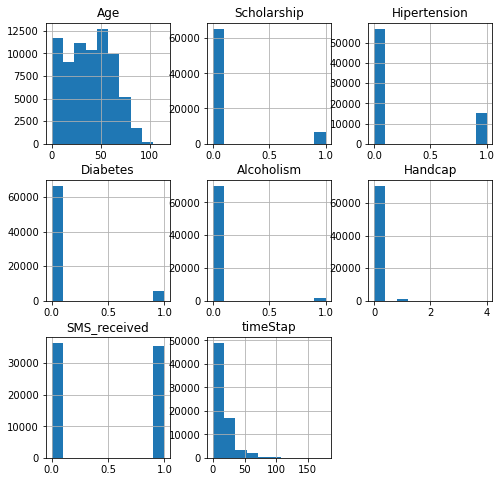

In [32]:
df.hist(figsize=(8,8));

- Research question 1: Does the gender affect who show up more at the appointment ?

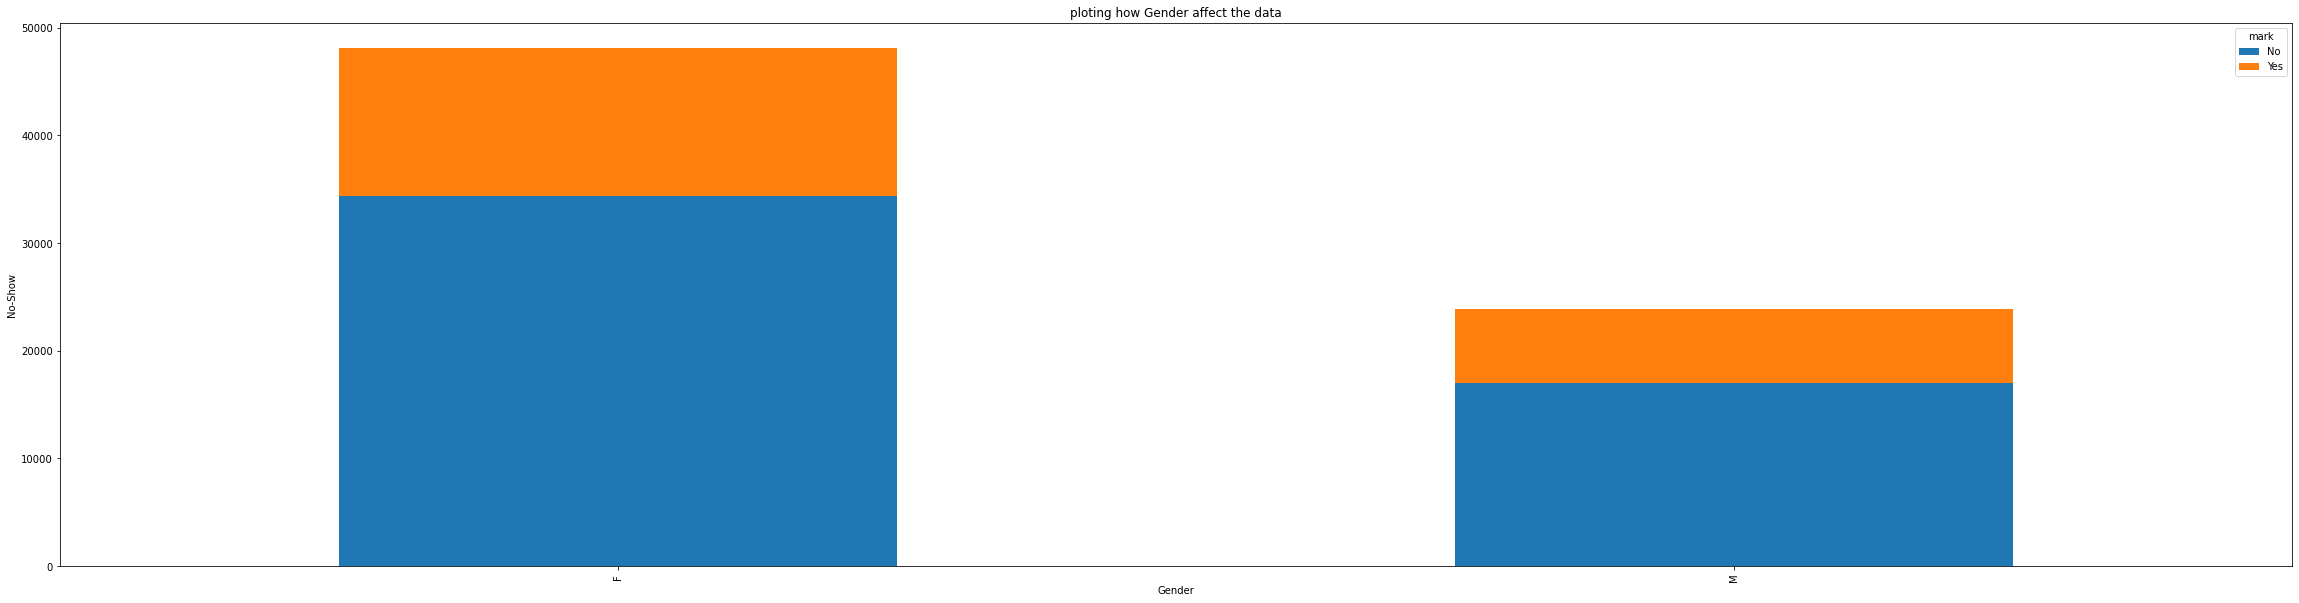

In [37]:
plotFig('Gender')

- women tend to visit the doctors more but gender doesn't seems to affect who shows up more

- Research question 2: Does the neighborhood affect who will show up more

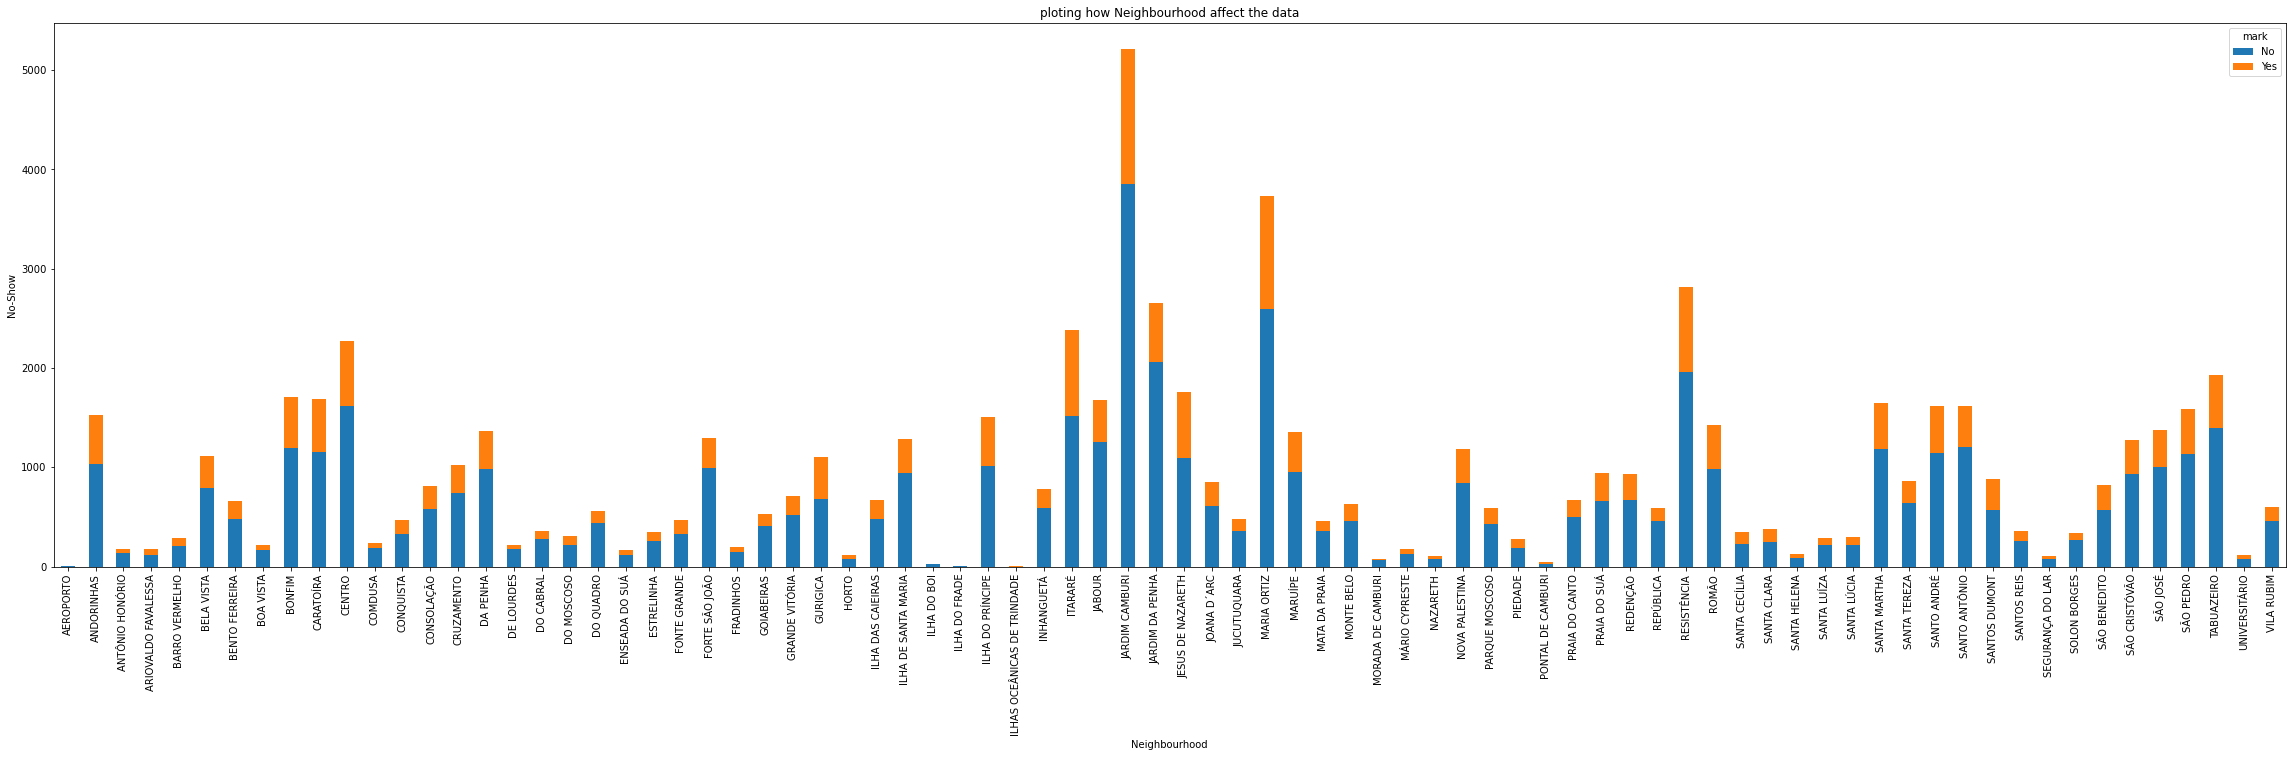

In [38]:
plotFig('Neighbourhood')

- there's areas that seems to visit the doctors more maybe because of high self awareness about the health care in those areas or because of increasing of the diseases in those areas

- Research question 3: Does people age affect who will gonna show up in the appointment?

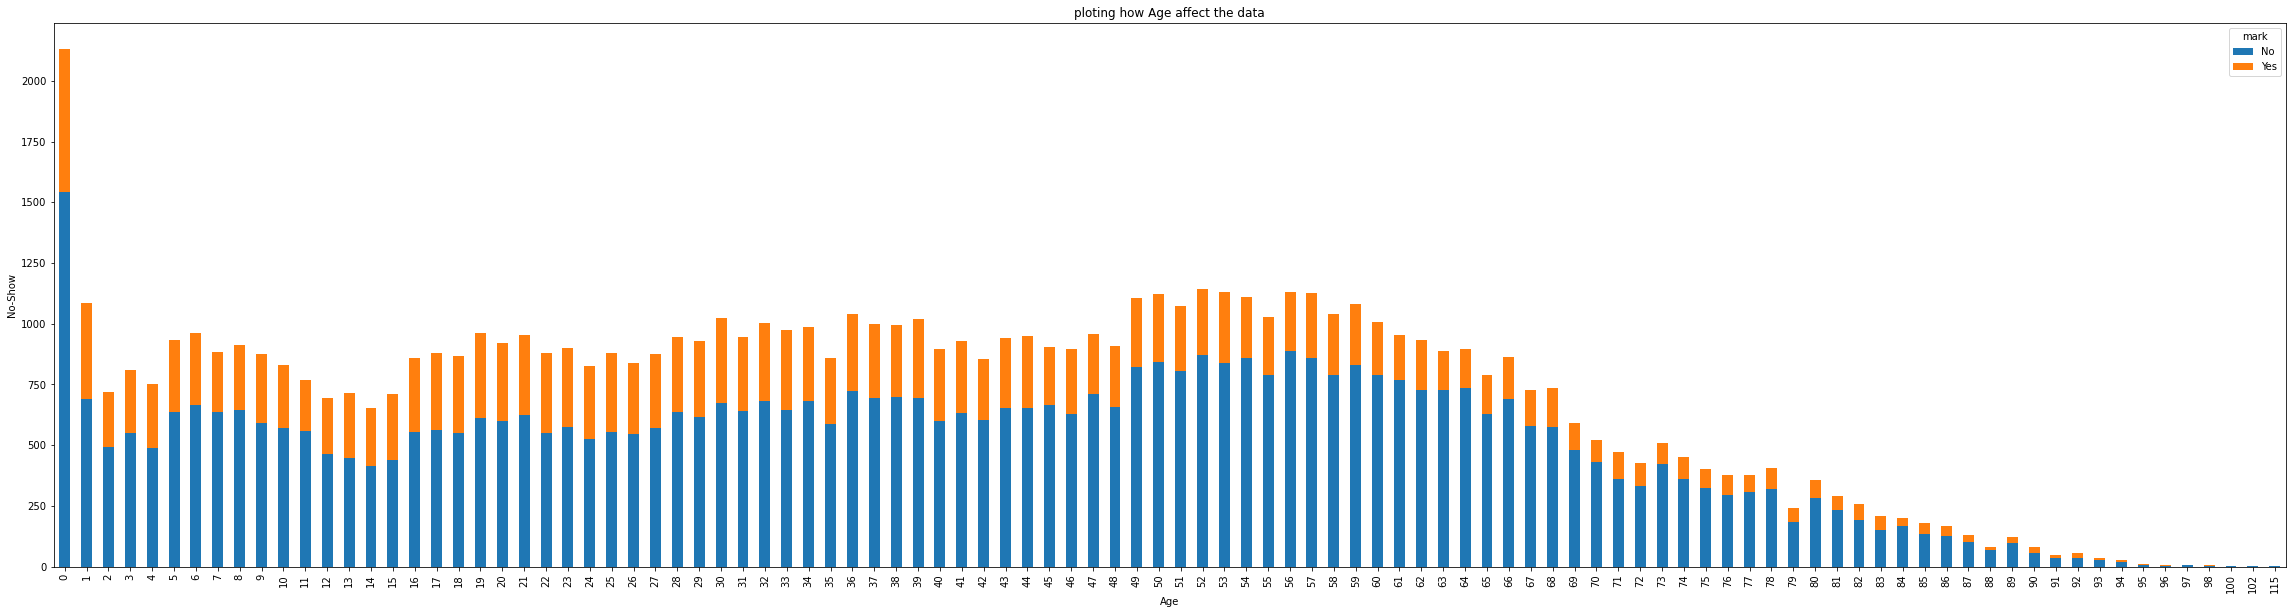

In [39]:
plotFig('Age')

- It seems that people in age range between 49 and 69 to visit the doctors more 
- people in that age group (49,69) they less likely to miss their appointment compared to the rest of ages groups

- Research question 4: does the medical history or the type of the disease affect who will show up most?

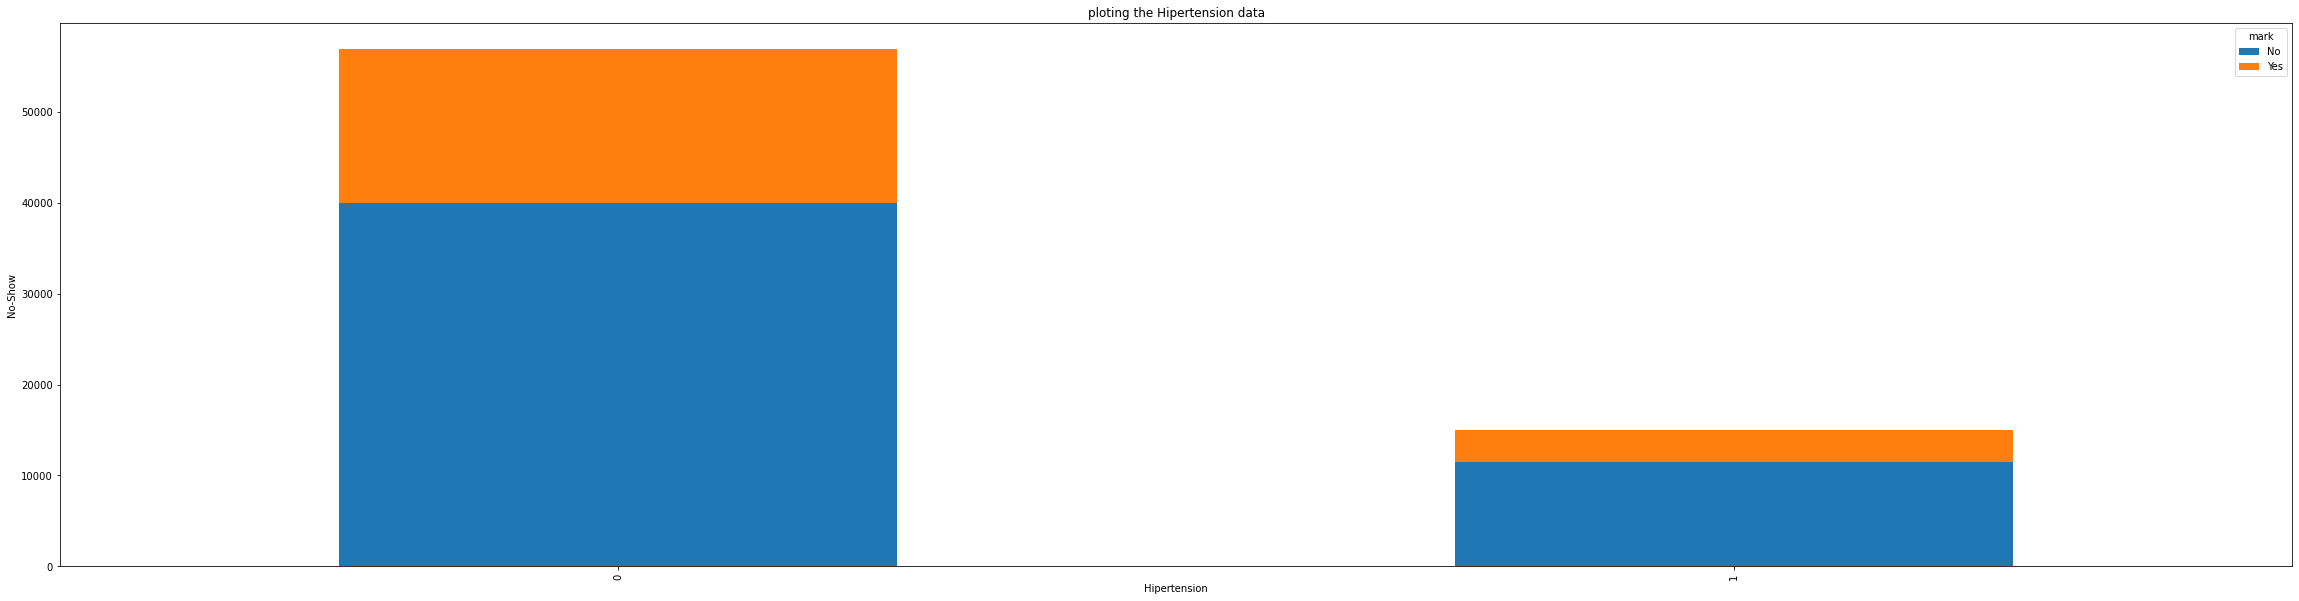

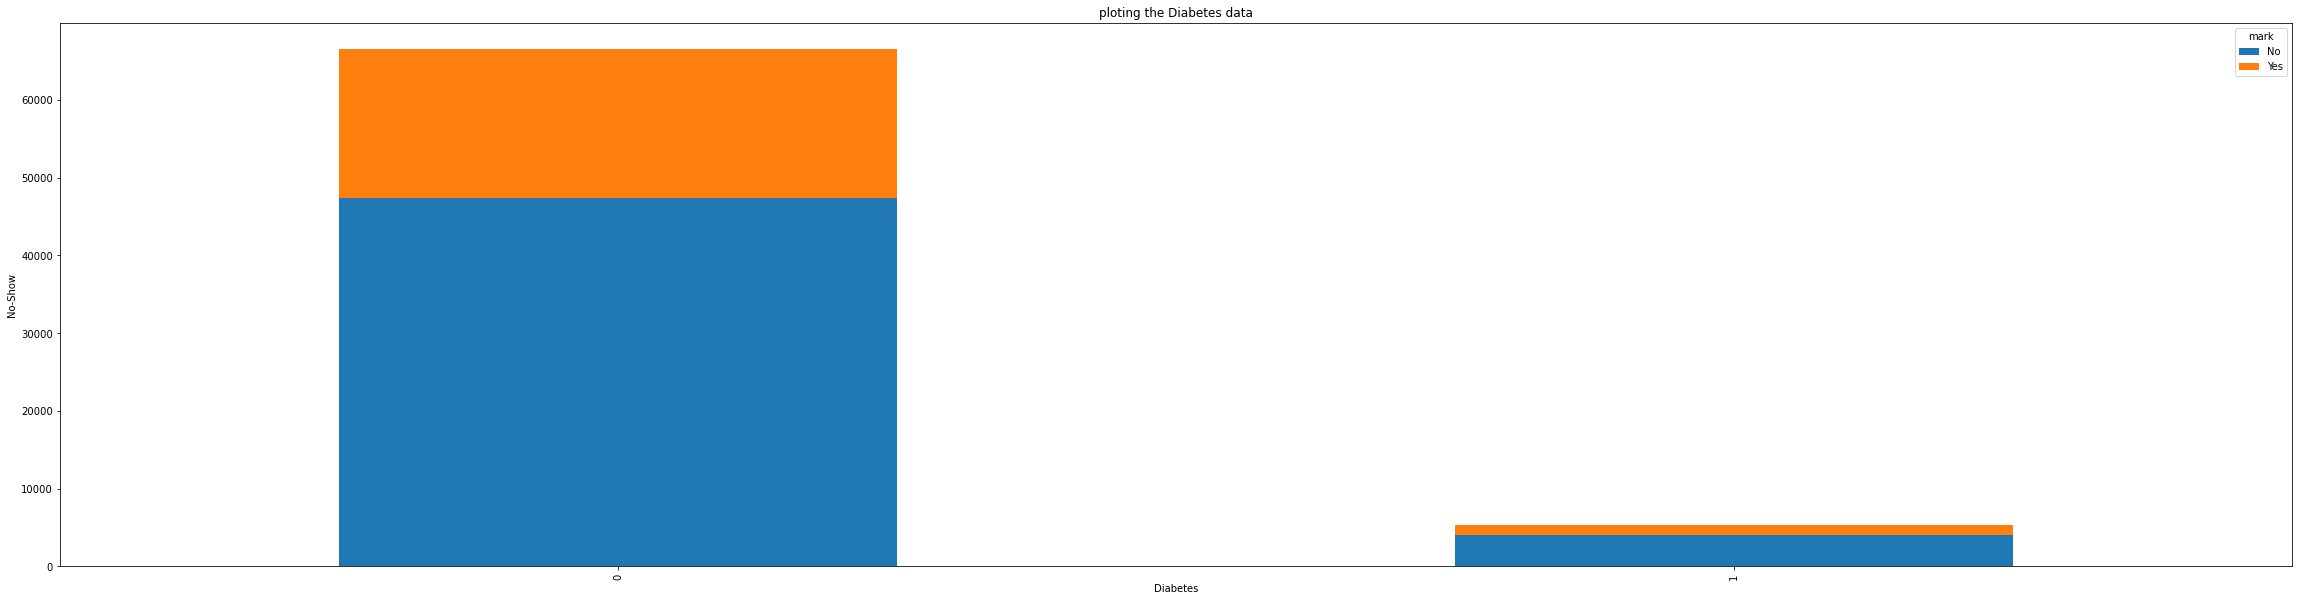

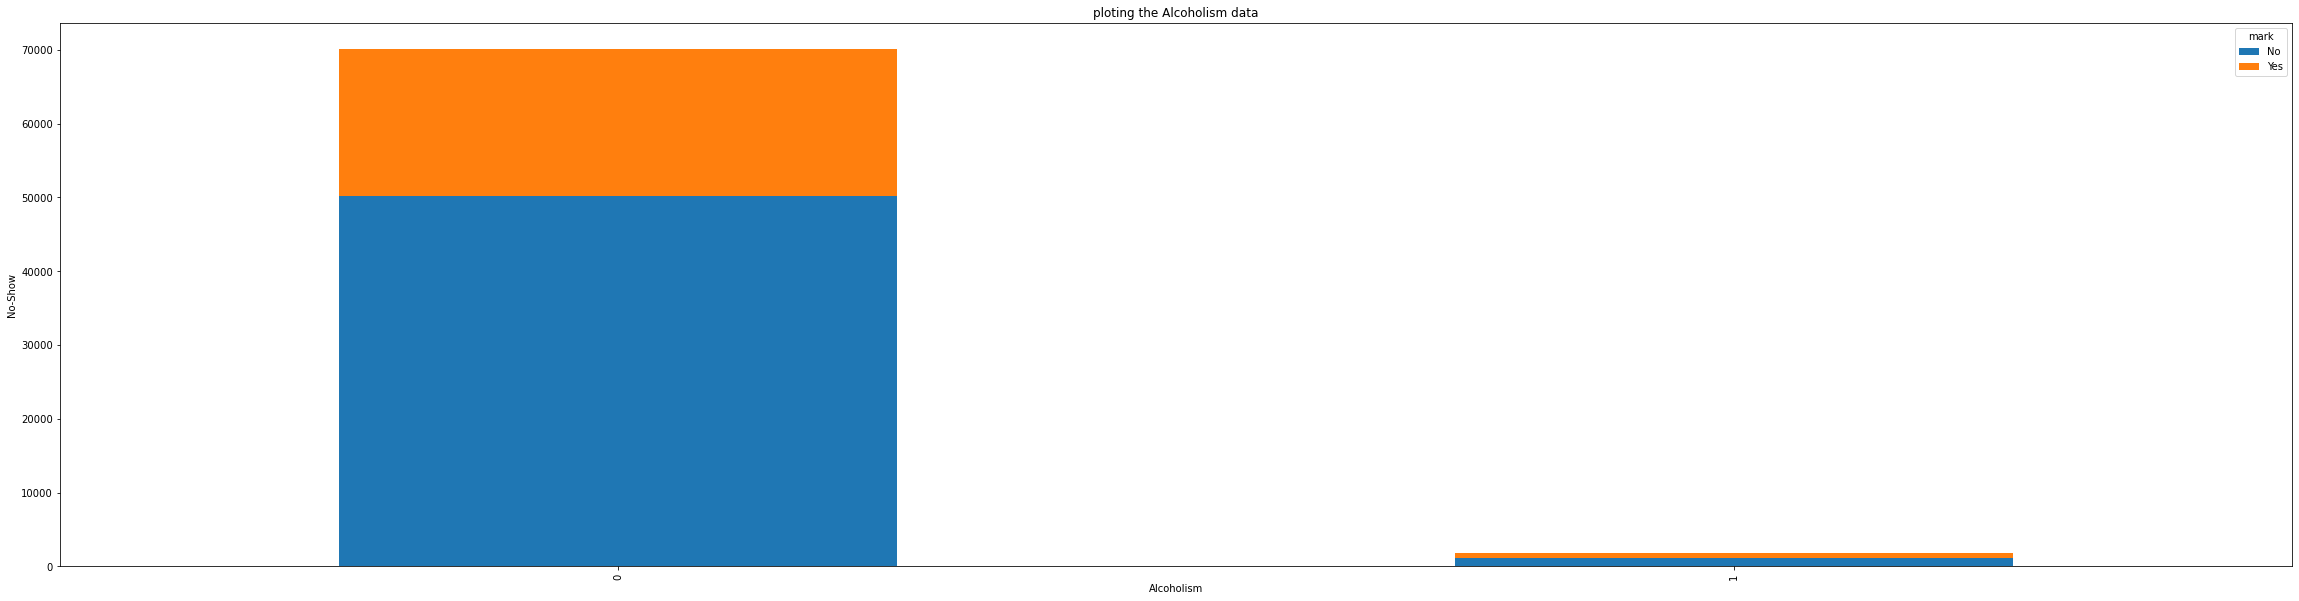

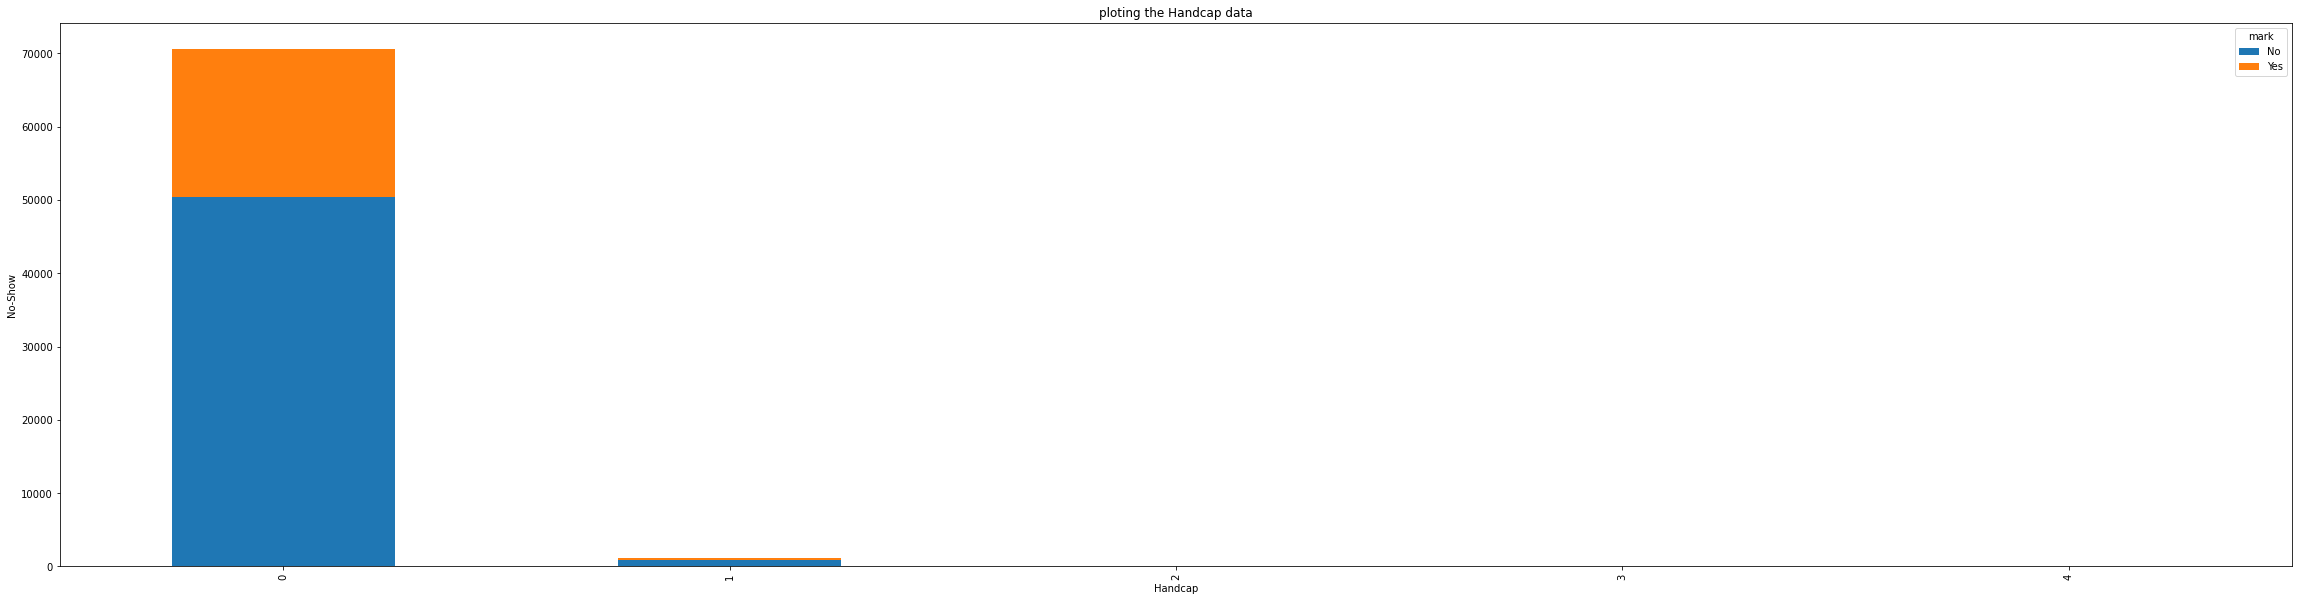

In [40]:
plotFig(['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])

- obviously people with a medical history tend to visit the doctors more but yet the disease type doesn't affect who will show up

- Research question 5: Does sending sms or the time between the appointment and when it has been scheduled affect who will show up the most ?

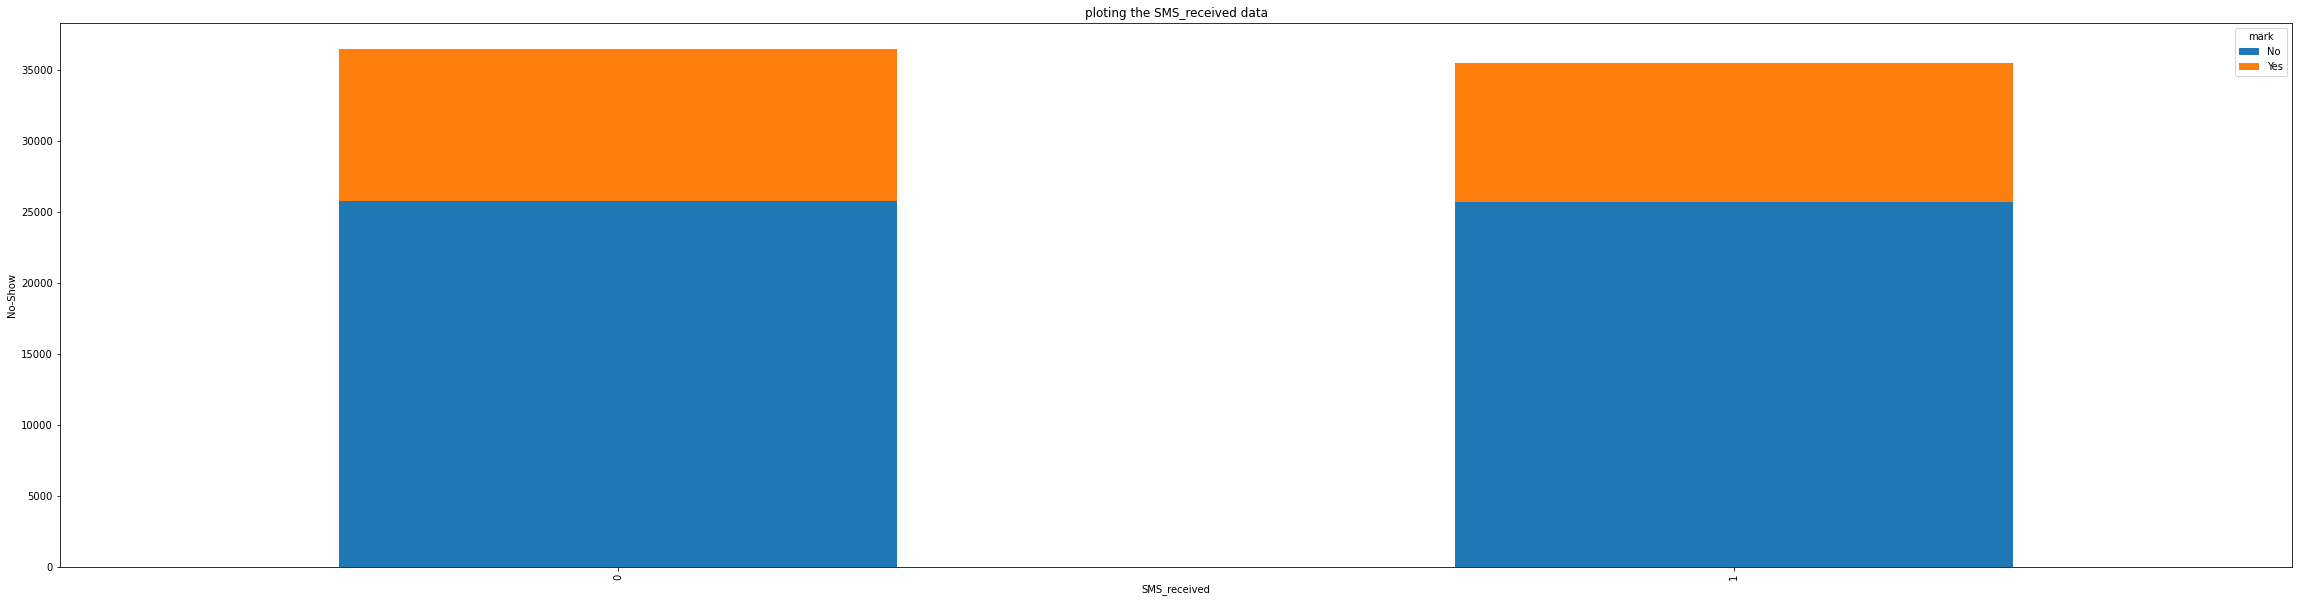

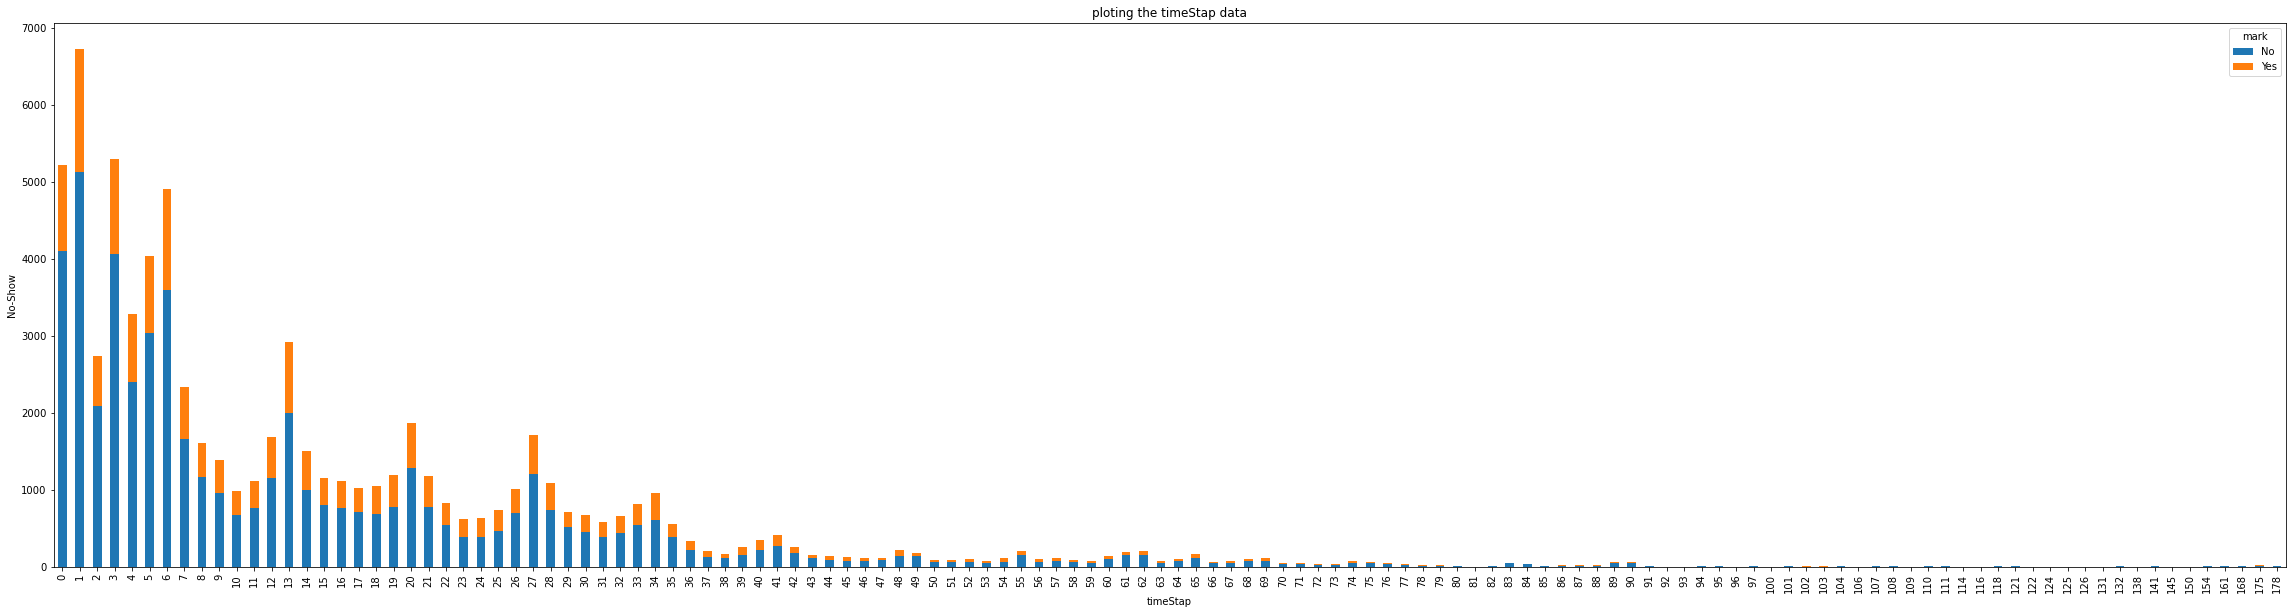

In [41]:
plotFig(['SMS_received','timeStap'])


- It doesn't seems to affect who will gonna show up

<AxesSubplot:>

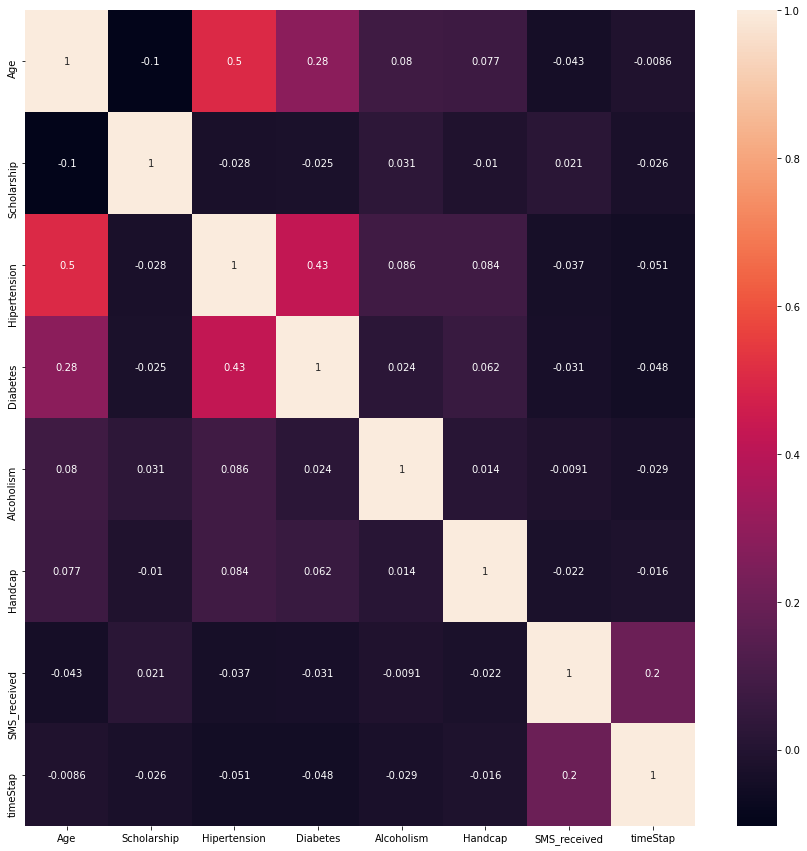

In [24]:
plt.figure(figsize=(15,15))
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)

# conclusion:

- After plotting the data using crosstab and heatmap the features show a very low correlation with the target label


- After investigate the date it shows that the number of women who visit the doctors are higher than the number of men's but it doesn't affect who show up more at their appointment
- the people in range between 49 and 60 seems to visit doctors and they are more likely to show up in their appointment than the rest of the ages groups 
- nneighbourhood seems to affect the people who visit their doctors and it has various of reasons 
     * maybe because of increase of diseases in the area
     * maybe because higher of self awareness about the health care 
- people with a medical history they are more likely to visit the doctors but it doesn't affect the percentage of who will gonna show up neither the disease type

# limitations:

- the dataset have alot of limitations that prevent us from getting good sights about the data 

    1) All of that have categorical variable except the age which prevent us from getting to know the data more 
    
    2) If the dataset provided us with more features like if we have the destination between the patient and the doctor if the patient working if the patient have kids which he can't leave them alone maybe if we had such feature it would help us to know more about why the patients don't show up 
    
- Such a limitation in the data didn't help us to know more about the case
    